<a href="https://colab.research.google.com/github/BenjaminGMC/sic_ai_2025_jun/blob/main/Ejercicio_lluvia_clase13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Primeras filas del dataset:


,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,No,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,No,No,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,No,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,Yes,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,No,Temperate,Invierno



📋 Columnas en el dataset:
['MinTemp', 'MaxTemp', 'Lluvia', 'Evaporacion', 'Sol', 'VelRafaga', 'Vel9am', 'Vel3pm', 'Hum9am', 'Hum3pm', 'Pres9am', 'Pre3pm', 'Nub9am', 'Nub3pm', 'Temp9am', 'Temp3pm', 'LluviaHoy', 'LluviaMan', 'Koppen', 'Estacion']

ℹ️ Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      56420 non-null  float64
 1   MaxTemp      56420 non-null  float64
 2   Lluvia       56420 non-null  float64
 3   Evaporacion  56420 non-null  float64
 4   Sol          56420 non-null  float64
 5   VelRafaga    56420 non-null  float64
 6   Vel9am       56420 non-null  float64
 7   Vel3pm       56420 non-null  float64
 8   Hum9am       56420 non-null  float64
 9   Hum3pm       56420 non-null  float64
 10  Pres9am      56420 non-null  float64
 11  Pre3pm       56420 non-null  float64
 12  Nub9am       56420 non-null

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,...,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion,Lluvia_Binary
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,...,1015.4,1.0,1.0,9.4,18.8,0,0,2,0,0
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,...,1015.2,1.0,1.0,11.9,17.9,0,0,2,0,0
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,...,1015.5,7.0,7.0,8.1,12.2,0,0,3,0,0
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,...,1015.0,7.0,7.0,9.3,13.4,0,1,3,0,0
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,...,1015.3,7.0,7.0,9.0,11.7,0,0,3,0,0



📈 Precisión por fold: [0.87743708 0.88124778 0.87717122 0.88195675 0.88204537]
🎯 Precisión promedio: 0.88


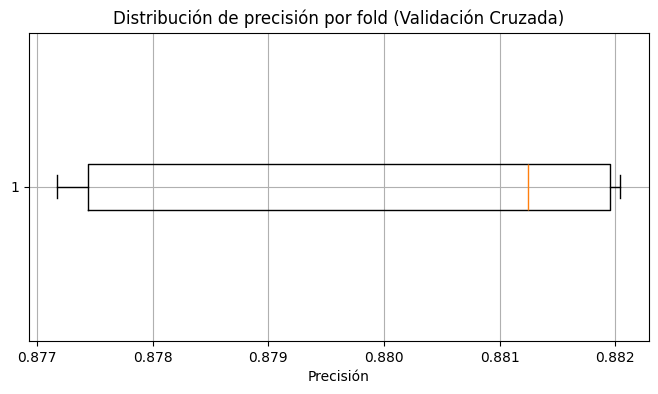

In [3]:
# Paso 1: Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Paso 2: Cargar el dataset desde GitHub
url = "https://raw.githubusercontent.com/davidlealo/tallermodelossupervisados/refs/heads/main/data/Lluvia_full.csv"
df = pd.read_csv(url)

print("✅ Primeras filas del dataset:")
display(df.head())

# Paso 3: Verificar columnas disponibles
print("\n📋 Columnas en el dataset:")
print(df.columns.tolist())

# Paso 4: Información general
print("\nℹ️ Información general:")
print(df.info())

# Paso 5: Preprocesamiento
# Eliminar valores nulos
df = df.dropna()

# Codificar variables categóricas a números
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

print("\n🧹 Datos después del preprocesamiento:")
display(df.head())

# Paso 6: Separar variables predictoras (X) y variable objetivo (y)
X = df.drop('Lluvia', axis=1)  # 🟢 CUIDADO: Lluvia con mayúscula
y = df['Lluvia']

# Paso 7: Definir el modelo
modelo = RandomForestClassifier(random_state=42)

# Paso 8: Validación cruzada con 5 folds
scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')

# Paso 9: Mostrar resultados
print("\n📈 Precisión por fold:", scores)
print("🎯 Precisión promedio:", round(scores.mean(), 4))

# Paso 10: Visualizar distribución de precisiones (opcional)
plt.figure(figsize=(8, 4))
plt.boxplot(scores, vert=False)
plt.title("Distribución de precisión por fold (Validación Cruzada)")
plt.xlabel("Precisión")
plt.grid(True)
plt.show()

In [ ]:
# prompt: usar lluviaman como variable objetivo y usar una validacionn cruzada usando grid sv

import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Paso 7 (modificado): Definir el modelo SVM
# Usaremos SVC (Support Vector Classifier) para clasificación
svm_model = SVC()

# Paso 8 (modificado): Definir la cuadrícula de hiperparámetros a buscar
# Puedes ajustar estos parámetros según lo necesites
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parámetro de regularización
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], # Coeficiente del kernel
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'] # Tipo de kernel
}

# Paso 9 (modificado): Realizar la validación cruzada con Grid Search
# cv=5 indica 5 folds para la validación cruzada
# scoring='accuracy' usa la precisión como métrica
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo con Grid Search en los datos
# Grid Search automáticamente divide los datos en folds para la validación cruzada
grid_search.fit(X, y)

# Paso 10 (modificado): Mostrar los resultados del Grid Search
print("\n🔍 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print("\n🎯 Mejor precisión promedio en validación cruzada:")
print(round(grid_search.best_score_, 4))

# También puedes ver los resultados detallados de cada combinación de parámetros
# results = pd.DataFrame(grid_search.cv_results_)
# display(results[['param_C', 'param_gamma', 'param_kernel', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head())

# El mejor modelo entrenado está disponible en grid_search.best_estimator_
best_svm_model = grid_search.best_estimator_

# Puedes evaluar este mejor modelo en nuevos datos si los tuvieras
# precision_mejor_modelo = best_svm_model.score(X_test, y_test)
# print("\nPrecisión del mejor modelo en datos de prueba:", precision_mejor_modelo)
